# Complex Network project - ECG and Heart rhythm disorders
Anna Mosenzon 200320836

In [1]:
import networkx as nx # the main libary we will use
from networkx.algorithms import bipartite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [2]:
import pylab as pl

In [3]:
import seaborn as sns

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
import itertools

In [6]:
import collections

In [7]:
from networkx.algorithms import centrality as ce

In [8]:
from networkx.algorithms.community import greedy_modularity_communities

In [9]:
from networkx.algorithms import community as c

In [10]:
import community

In [7]:
'''selecting relevant columns: Average width wave, in msec.: Q, R, S, R', S' '''
width_col_range = []
for i in range(15, 153):
    if i % 12 <= 7 and i % 12 >= 3:
        width_col_range.append(i)

In [12]:
'''selecting relevant columns: Amplitude , * 0.1 milivolt of: JJ, Q, R, S, R', S', P, T'''
amplitude_col_range = []
for i in range(159, 278):
    if i % 10 < 7 or i % 10 > 8:
        amplitude_col_range.append(i)

Variance for each wave:
           data
Wave           
JJ     0.848888
P      0.433215
Q      6.499843
R     25.726582
R'     0.399778
S     25.397283
S'     0.019645
T      4.684367


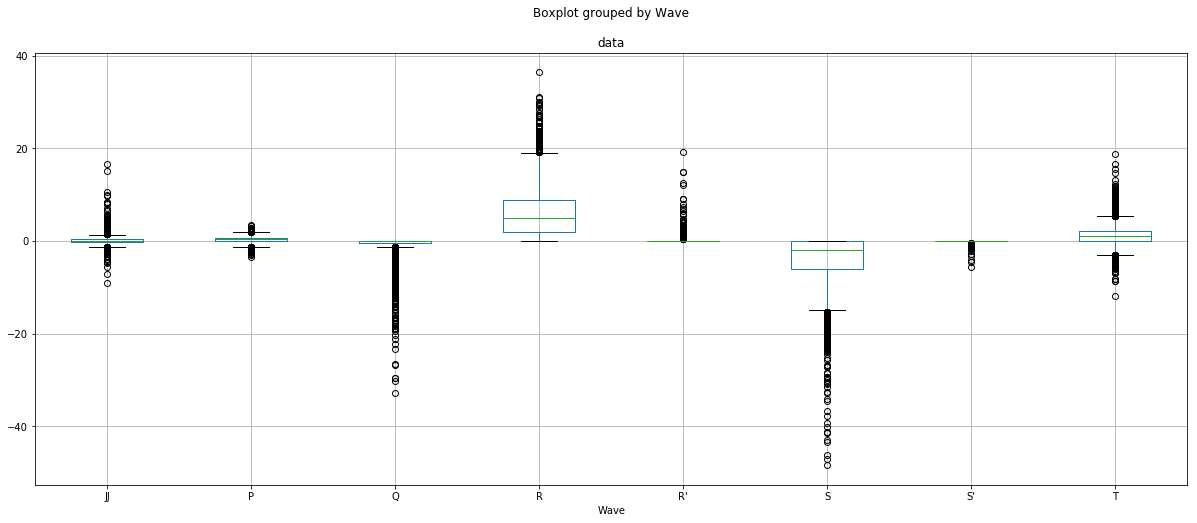

In [13]:
df_net_wave_amplitude = pd.read_csv(r'C:\Users\apergame\Documents\My Docs\MSc Business Analytics\סמסטר ב 2020\רשתות מורכבות\arrhythmia UCI.csv', usecols = amplitude_col_range)
df_net_wave_amplitude_for_std = df_net_wave_amplitude
df_net_wave_amplitude_for_std.columns = ['JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T', 'JJ', 'Q', 'R', 'S', 'R\'', 'S\'', 'P', 'T']
df_net_wave_amplitude_for_std = df_net_wave_amplitude_for_std.stack()
df_net_wave_amplitude_for_std = df_net_wave_amplitude_for_std.reset_index()
del df_net_wave_amplitude_for_std['level_0']
df_net_wave_amplitude_for_std.columns = ['Wave', 'data']
var = df_net_wave_amplitude_for_std.groupby(['Wave']).var()
print('Variance for each wave:')
print(var)
# df_net_wave_amplitude_for_std.to_csv('df_net_wave_amplitude_for_std_rev1.csv')
bp = df_net_wave_amplitude_for_std.boxplot('data', by='Wave', figsize=(20,8))

since Q, R, S and T waves are with the highest variaty so I used the data about these waves only.
Q, R and S were also viewed saparately as well since QRS complex is the main part in the ECG output, but eventually the QRST complex was taken.

In [9]:
'''selecting relevant columns: Amplitude , * 0.1 milivolt of: Q, R, S - the columns with the highest variation'''
QRS_amplitude_col_range = []
for i in range(159, 278):
    if i % 10 < 3 and i % 10 >= 0:
        QRS_amplitude_col_range.append(i)

In [15]:
'''selecting relevant columns: Amplitude , * 0.1 milivolt of: Q, R, S - the columns with the highest variation'''
QRST_amplitude_col_range = []
for i in range(159, 278):
    if ((i % 10 < 3 and i % 10 >= 0) or (i % 10 == 6)):
        QRST_amplitude_col_range.append(i)

In [10]:
df_net_wave_avg_width = pd.read_csv(r'C:\Users\apergame\Documents\My Docs\MSc Business Analytics\סמסטר ב 2020\רשתות מורכבות\arrhythmia UCI.csv', usecols = width_col_range)
df_net_wave_avg_width.columns = ['DI Q wave', 'DI R wave', 'DI S wave', 'DI R\' wave ', 'DI S\' wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DII R\' wave', 'DII S\' wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'DIII R\' wave', 'DIII S\' wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVR R\' wave', 'AVR S\' wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVL R\' wave', 'AVL S\' wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'AVF R\' wave', 'AVF S\' wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V1 R\' wave ', 'V1 S\' wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V2 R\' wave', 'V2 S\' wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V3 R\' wave', 'V3 S\' wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V4 R\' wave', 'V4 S\' wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V5 R\' wave', 'V5 S\' wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave', 'V6 R\' wave', 'V6 S\' wave']
# df_net_wave_avg_width.to_csv('df_net_wave_avg_width.csv')

Variance for each wave:
            data
Wave            
Q     427.063978
R     409.785364
R'     45.669108
S     583.338219
S'      3.886846


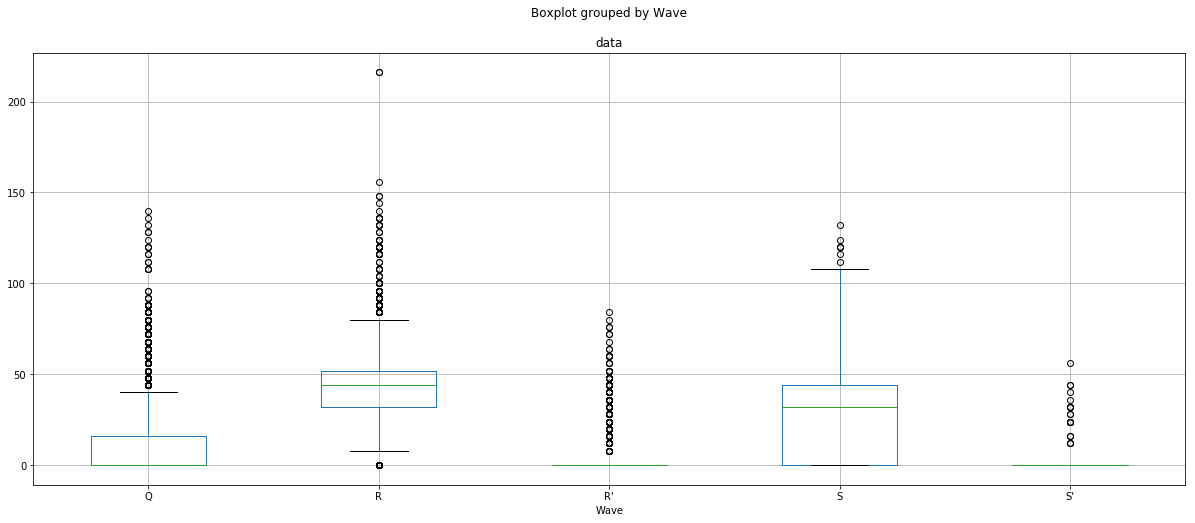

In [127]:
df_net_wave_avg_width_for_std = df_net_wave_avg_width
df_net_wave_avg_width_for_std.columns = ['Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S\'', 'Q', 'R', 'S', 'R\'', 'S']
df_net_wave_avg_width_for_std = df_net_wave_avg_width_for_std.stack()
df_net_wave_avg_width_for_std = df_net_wave_avg_width_for_std.reset_index()
del df_net_wave_avg_width_for_std['level_0']
df_net_wave_avg_width_for_std.columns = ['Wave', 'data']
var = df_net_wave_avg_width_for_std.groupby(['Wave']).var()
print('Variance for each wave:')
print(var)
bp = df_net_wave_avg_width_for_std.boxplot('data', by='Wave', figsize=(20,8))

In [11]:
df_net_wave_amplitude = pd.read_csv(r'C:\Users\apergame\Documents\My Docs\MSc Business Analytics\סמסטר ב 2020\רשתות מורכבות\arrhythmia UCI.csv', usecols = amplitude_col_range)
df_net_wave_amplitude.columns = ['DI Amplitude JJ wave', 'DI Amplitude Q wave', 'DI Amplitude R wave', 'DI Amplitude S wave', 'DI Amplitude R\' wave', 'DI Amplitude S\' wave', 'DI Amplitude P wave', 'DI Amplitude T wave', 'DII Amplitude JJ wave', 'DII Amplitude Q wave', 'DII Amplitude R wave', 'DII Amplitude S wave', 'DII Amplitude R\' wave', 'DII Amplitude S\' wave', 'DII Amplitude P wave', 'DII Amplitude T wave', 'DIII Amplitude JJ wave', 'DIII Amplitude Q wave', 'DIII Amplitude R wave', 'DIII Amplitude S wave', 'DIII Amplitude R\' wave', 'DIII Amplitude S\' wave', 'DIII Amplitude P wave', 'DIII Amplitude T wave', 'AVR Amplitude JJ wave', 'AVR Amplitude Q wave', 'AVR Amplitude R wave', 'AVR Amplitude S wave', 'AVR Amplitude R\' wave', 'AVR Amplitude S\' wave', 'AVR Amplitude P wave', 'AVR Amplitude T wave', 'AVL Amplitude JJ wave', 'AVL Amplitude Q wave', 'AVL Amplitude R wave', 'AVL Amplitude S wave', 'AVL Amplitude R\' wave', 'AVL Amplitude S\' wave', 'AVL Amplitude P wave', 'AVL Amplitude T wave', 'AVF Amplitude JJ wave', 'AVF Amplitude Q wave', 'AVF Amplitude R wave', 'AVF Amplitude S wave', 'AVF Amplitude R\' wave', 'AVF Amplitude S\' wave', 'AVF Amplitude P wave', 'AVF Amplitude T wave', 'V1 Amplitude JJ wave', 'V1 Amplitude Q wave', 'V1 Amplitude R wave', 'V1 Amplitude S wave', 'V1 Amplitude R\' wave', 'V1 Amplitude S\' wave', 'V1 Amplitude P wave', 'V1 Amplitude T wave', 'V2 Amplitude JJ wave', 'V2 Amplitude Q wave', 'V2 Amplitude R wave', 'V2 Amplitude S wave', 'V2 Amplitude R\' wave', 'V2 Amplitude S\' wave', 'V2 Amplitude P wave', 'V2 Amplitude T wave', 'V3 Amplitude JJ wave', 'V3 Amplitude Q wave', 'V3 Amplitude R wave', 'V3 Amplitude S wave', 'V3 Amplitude R\' wave', 'V3 Amplitude S\' wave', 'V3 Amplitude P wave', 'V3 Amplitude T wave', 'V4 Amplitude JJ wave', 'V4 Amplitude Q wave', 'V4 Amplitude R wave', 'V4 Amplitude S wave', 'V4 Amplitude R\' wave', 'V4 Amplitude S\' wave', 'V4 Amplitude P wave', 'V4 Amplitude T wave', 'V5 Amplitude JJ wave', 'V5 Amplitude Q wave', 'V5 Amplitude R wave', 'V5 Amplitude S wave', 'V5 Amplitude R\' wave', 'V5 Amplitude S\' wave', 'V5 Amplitude P wave', 'V5 Amplitude T wave', 'V6 Amplitude JJ wave', 'V6 Amplitude Q wave', 'V6 Amplitude R wave', 'V6 Amplitude S wave', 'V6 Amplitude R\' wave', 'V6 Amplitude S\' wave', 'V6 Amplitude P wave', 'V6 Amplitude T wave']
# df_net_wave_amplitude.to_csv('df_net_wave_amplitude.csv')

In [133]:
df_net_wave_amplitude_QRS = pd.read_csv(r'C:\Users\apergame\Documents\My Docs\MSc Business Analytics\סמסטר ב 2020\רשתות מורכבות\arrhythmia UCI.csv', usecols = QRST_amplitude_col_range)
df_net_wave_amplitude_QRS.columns = ['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave']
# df_net_wave_amplitude_QRS.to_csv('df_net_wave_amplitude_QRS.csv')

In [16]:
df_net_wave_amplitude_QRST = pd.read_csv(r'C:\Users\apergame\Documents\My Docs\MSc Business Analytics\סמסטר ב 2020\רשתות מורכבות\arrhythmia UCI.csv', usecols = QRST_amplitude_col_range)
df_net_wave_amplitude_QRST.columns = ['DI Amplitude Q', 'DI Amplitude R', 'DI Amplitude S', 'DI Amplitude T', 'DII Amplitude Q', 'DII Amplitude R', 'DII Amplitude S', 'DII Amplitude T', 'DIII Amplitude Q', 'DIII Amplitude R', 'DIII Amplitude S', 'DIII Amplitude T', 'AVR Amplitude Q', 'AVR Amplitude R', 'AVR Amplitude S', 'AVR Amplitude T', 'AVL Amplitude Q', 'AVL Amplitude R', 'AVL Amplitude S', 'AVL Amplitude T', 'AVF Amplitude Q', 'AVF Amplitude R', 'AVF Amplitude S', 'AVF Amplitude T', 'V1 Amplitude Q', 'V1 Amplitude R', 'V1 Amplitude S', 'V1 Amplitude T', 'V2 Amplitude Q', 'V2 Amplitude R', 'V2 Amplitude S', 'V2 Amplitude T', 'V3 Amplitude Q', 'V3 Amplitude R', 'V3 Amplitude S', 'V3 Amplitude T', 'V4 Amplitude Q', 'V4 Amplitude R', 'V4 Amplitude S', 'V4 Amplitude T', 'V5 Amplitude Q', 'V5 Amplitude R', 'V5 Amplitude S', 'V5 Amplitude T', 'V6 Amplitude Q', 'V6 Amplitude R', 'V6 Amplitude S', 'V6 Amplitude T']
# df_net_wave_amplitude_QRST.to_csv('df_net_wave_amplitude_QRST.csv')

creating cosine similarity matrix patient vs. patient

In [13]:
df_net_wave_avg_width_cosine = pd.DataFrame(cosine_similarity(df_net_wave_avg_width, df_net_wave_avg_width))

In [14]:
df_net_wave_amplitude_cosine = pd.DataFrame(cosine_similarity(df_net_wave_amplitude, df_net_wave_amplitude))

In [15]:
df_net_wave_amplitude_QRS_cosine = pd.DataFrame(cosine_similarity(df_net_wave_amplitude_QRS, df_net_wave_amplitude_QRS))

In [17]:
df_net_wave_amplitude_QRST_cosine = pd.DataFrame(cosine_similarity(df_net_wave_amplitude_QRST, df_net_wave_amplitude_QRST))

creating nodes file in Gephi format

In [18]:
df_nodes = pd.read_csv(r'C:\Users\apergame\Documents\My Docs\MSc Business Analytics\סמסטר ב 2020\רשתות מורכבות\arrhythmia UCI.csv', usecols = [0,1,2,3,4,279])
df_nodes.columns = ['Age', 'Sex', 'Height', 'Weight', 'QRS duration', 'Pathology']
arrhythmia_dict = {
1 : 'Normal',
2 : 'Ischemic changes (Coronary Artery Disease)',
3 : 'Old Anterior Myocardial Infarction',
4 : 'Old Inferior Myocardial Infarction',
5 : 'Sinus tachycardy',
6 : 'Sinus bradycardy',
7 : 'Ventricular Premature Contraction (PVC)',
8 : 'Supraventricular Premature Contraction',
9 : 'Left bundle branch block',
10 : 'Right bundle branch block',
11 : 'degree AtrioVentricular block',
12 : 'degree AV block',
13 : 'degree AV block',
14 : 'Left ventricule hypertrophy',
15 : 'Atrial Fibrillation or Flutter',
16 : 'Others'
}
label_list = [arrhythmia_dict[i] for i in df_nodes['Pathology']]
df_nodes.insert(0, 'Label', label_list)
df_nodes.index.name = 'Id'
df_nodes['Pathology'].value_counts()
# df_nodes.to_csv('df_nodes.csv')

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: Pathology, dtype: int64

creating edges file in Gephi format

In [17]:
'''creating edges file in Gephi format'''
'''edged based on wave width:'''
df_bool = df_net_wave_avg_width_cosine.where(np.triu(np.ones(df_net_wave_avg_width_cosine.shape), k=1).astype(np.bool))
df_edges_width = df_bool.stack().reset_index()
df_edges_width.columns = ['Source', 'Target', 'Weight']
type_col = pd.DataFrame(['undirected']*len(df_edges_width))
df_edges_width.insert(2, 'Type', type_col)
# df_edges_width.to_csv('df_edges_width.csv')

In [18]:
'''edged based on wave amplitude:'''
df_bool = df_net_wave_amplitude_cosine.where(np.triu(np.ones(df_net_wave_amplitude_cosine.shape), k=1).astype(np.bool))
df_edges_amplitude = df_bool.stack().reset_index()
df_edges_amplitude.columns = ['Source', 'Target', 'Weight']
type_col = pd.DataFrame(['undirected']*len(df_edges_amplitude))
df_edges_amplitude.insert(2, 'Type', type_col)
# df_edges_amplitude.to_csv('df_edges_amplitude.csv')

In [19]:
'''edged based on wave amplitude with Q, R , S only and weight higher than 0.5:'''
df_bool = df_net_wave_amplitude_QRS_cosine.where(np.triu(np.ones(df_net_wave_amplitude_QRS_cosine.shape), k=1).astype(np.bool))
df_edges_amplitude_QRS = df_bool.stack().reset_index()
df_edges_amplitude_QRS.columns = ['Source', 'Target', 'Weight']
type_col = pd.DataFrame(['undirected']*len(df_edges_amplitude_QRS))
df_edges_amplitude_QRS.insert(2, 'Type', type_col)
df_edges_amplitude_QRS.index.name = 'Id'
df_edges_amplitude_QRS = df_edges_amplitude_QRS[df_edges_amplitude_QRS.Weight > 0.5]
# df_edges_amplitude_QRS.to_csv('df_edges_amplitude_QRS_weight_higher_than_0.5.csv')
# df_edges_amplitude_QRS.to_csv('df_edges_amplitude_QRS.csv')

In [85]:
'''edged based on wave amplitude with Q, R , S and T only and weight higher than 0.5:'''
df_bool = df_net_wave_amplitude_QRST_cosine.where(np.triu(np.ones(df_net_wave_amplitude_QRST_cosine.shape), k=1).astype(np.bool))
df_edges_amplitude_QRST = df_bool.stack().reset_index()
df_edges_amplitude_QRST.columns = ['Source', 'Target', 'Weight']
type_col = pd.DataFrame(['undirected']*len(df_edges_amplitude_QRST))
df_edges_amplitude_QRST.insert(2, 'Type', type_col)
df_edges_amplitude_QRST.index.name = 'Id'
df_edges_amplitude_QRST = df_edges_amplitude_QRST[df_edges_amplitude_QRST.Weight > 0.5]
# df_edges_amplitude_QRST.to_csv('df_edges_amplitude_QRST_weight_higher_than_0.5.csv')

Text(0.5, 1.0, 'Normal range of QRS amplitude values')

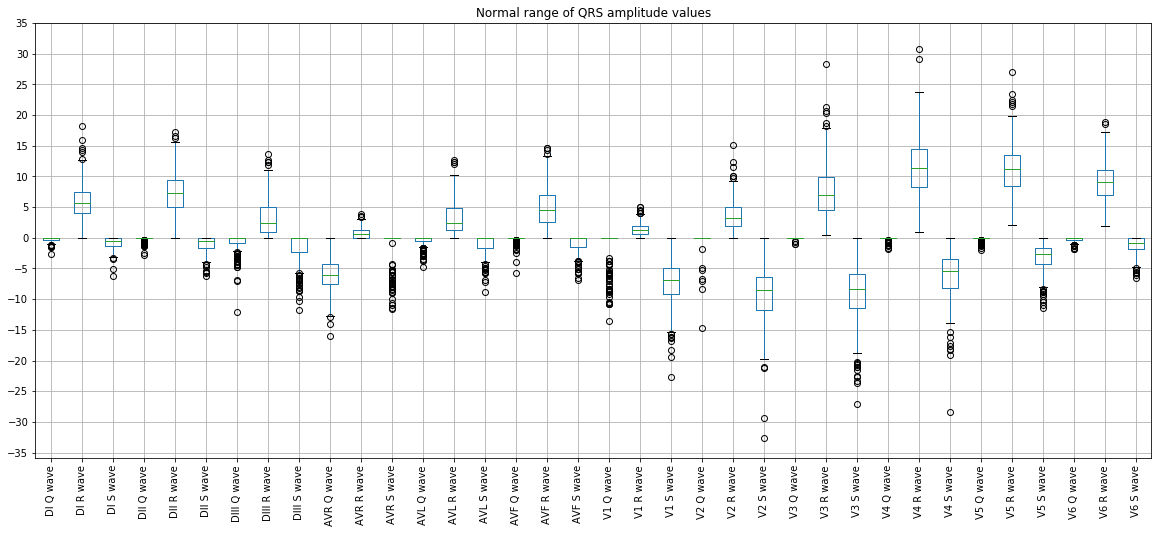

In [20]:
df_net_wave_amplitude_QRS.insert(len(df_net_wave_amplitude_QRS.columns), 'Pathology', label_list)
df_edges_amplitude_QRS_normal = df_net_wave_amplitude_QRS[df_net_wave_amplitude_QRS.Pathology == 'Normal']
df_edges_amplitude_QRS_normal.columns = ['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave', 'Pathology']
boxplot = df_edges_amplitude_QRS_normal.boxplot(column=['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave'], return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Normal range of QRS amplitude values')

Text(0.5, 1.0, 'Normal range of QRST amplitude values')

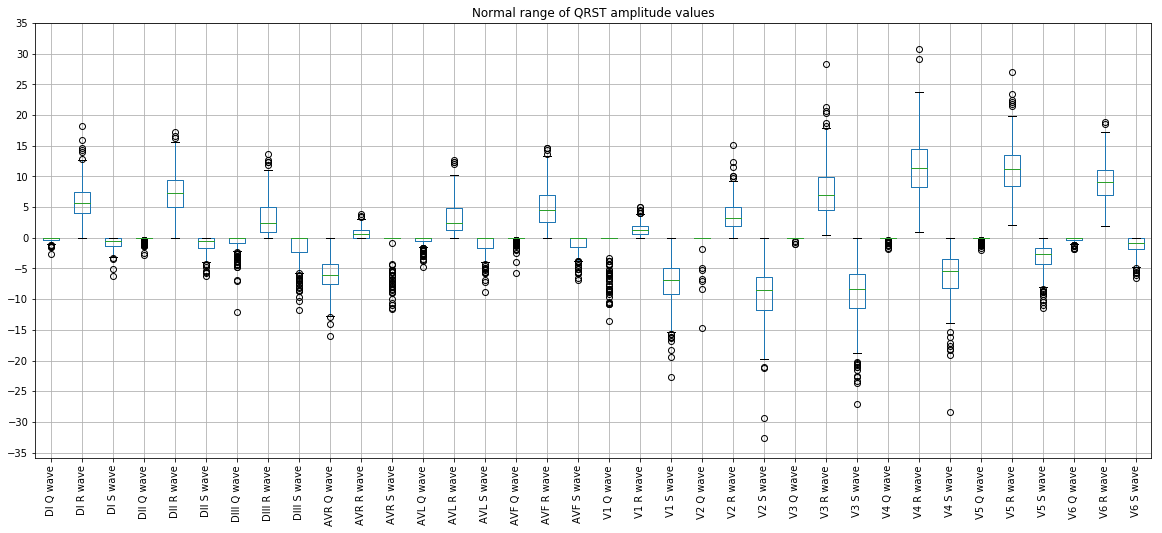

In [141]:
# df_net_wave_amplitude_QRST.insert(len(df_net_wave_amplitude_QRST.columns), 'Pathology', label_list)
df_edges_amplitude_QRST_normal = df_net_wave_amplitude_QRST[df_net_wave_amplitude_QRST.Pathology == 'Normal']
df_edges_amplitude_QRST_normal.columns = ['DI Amplitude Q', 'DI Amplitude R', 'DI Amplitude S', 'DI Amplitude T', 'DII Amplitude Q', 'DII Amplitude R', 'DII Amplitude S', 'DII Amplitude T', 'DIII Amplitude Q', 'DIII Amplitude R', 'DIII Amplitude S', 'DIII Amplitude T', 'AVR Amplitude Q', 'AVR Amplitude R', 'AVR Amplitude S', 'AVR Amplitude T', 'AVL Amplitude Q', 'AVL Amplitude R', 'AVL Amplitude S', 'AVL Amplitude T', 'AVF Amplitude Q', 'AVF Amplitude R', 'AVF Amplitude S', 'AVF Amplitude T', 'V1 Amplitude Q', 'V1 Amplitude R', 'V1 Amplitude S', 'V1 Amplitude T', 'V2 Amplitude Q', 'V2 Amplitude R', 'V2 Amplitude S', 'V2 Amplitude T', 'V3 Amplitude Q', 'V3 Amplitude R', 'V3 Amplitude S', 'V3 Amplitude T', 'V4 Amplitude Q', 'V4 Amplitude R', 'V4 Amplitude S', 'V4 Amplitude T', 'V5 Amplitude Q', 'V5 Amplitude R', 'V5 Amplitude S', 'V5 Amplitude T', 'V6 Amplitude Q', 'V6 Amplitude R', 'V6 Amplitude S', 'V6 Amplitude T', 'Pathology']
boxplot = df_edges_amplitude_QRS_normal.boxplot(return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Normal range of QRST amplitude values')

Text(0.5, 1.0, 'Right Bundle Branch Block range of QRS amplitude values')

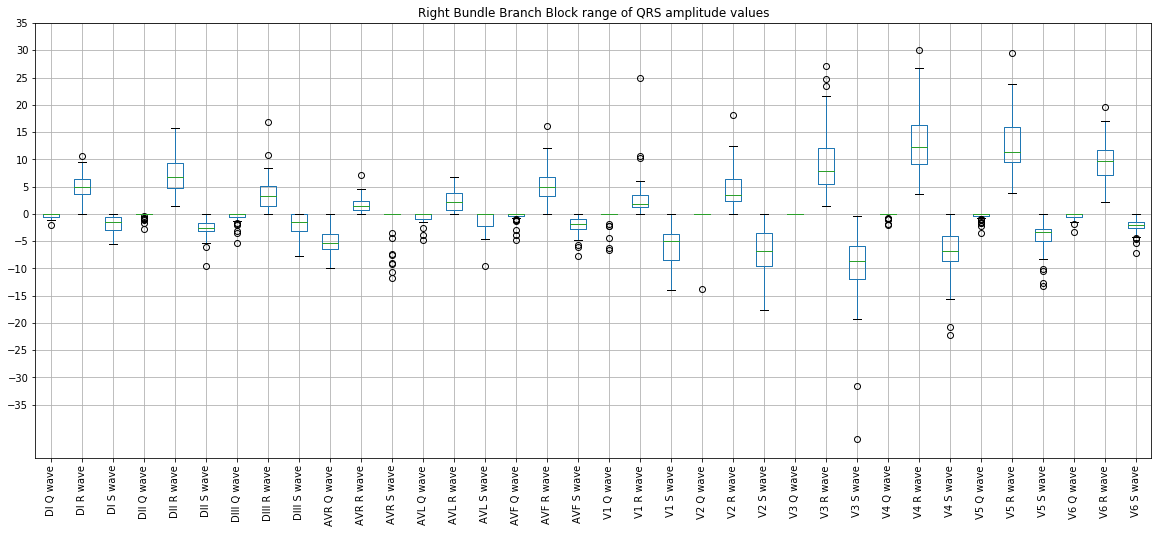

In [21]:
df_edges_amplitude_QRS_Right_Bundle_Branch_Block = df_net_wave_amplitude_QRS[df_net_wave_amplitude_QRS.Pathology == 'Right bundle branch block']
df_edges_amplitude_QRS_normal.columns = ['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave', 'Pathology']
boxplot = df_edges_amplitude_QRS_Right_Bundle_Branch_Block.boxplot(column=['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave'], return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Right Bundle Branch Block range of QRS amplitude values')

Text(0.5, 1.0, 'Right Bundle Branch Block range of QRST amplitude values')

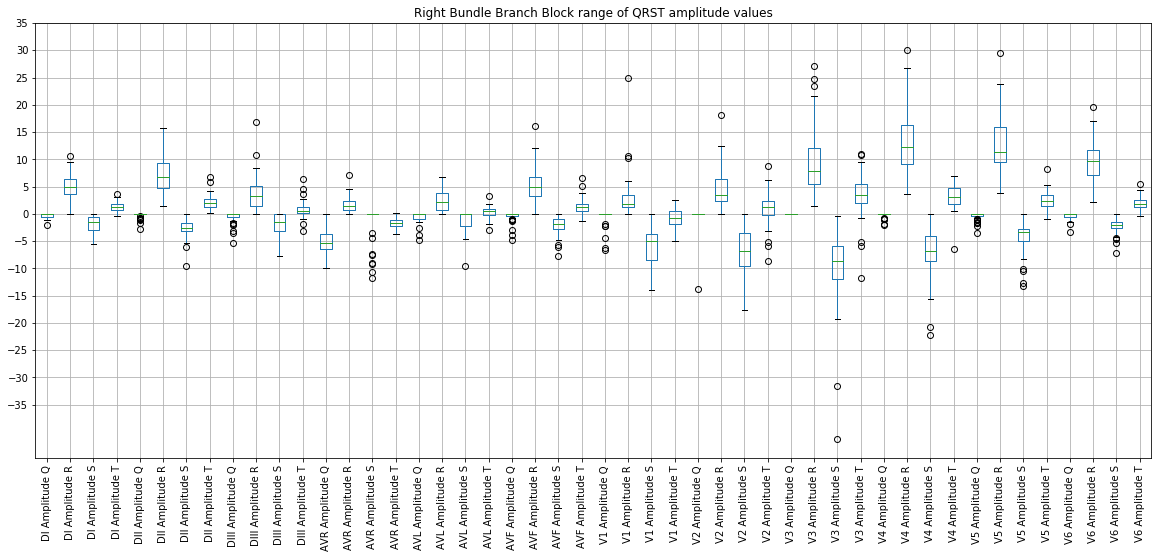

In [143]:
df_edges_amplitude_QRST_Right_Bundle_Branch_Block = df_net_wave_amplitude_QRST[df_net_wave_amplitude_QRST.Pathology == 'Right bundle branch block']
df_edges_amplitude_QRST_normal.columns = ['DI Amplitude Q', 'DI Amplitude R', 'DI Amplitude S', 'DI Amplitude T', 'DII Amplitude Q', 'DII Amplitude R', 'DII Amplitude S', 'DII Amplitude T', 'DIII Amplitude Q', 'DIII Amplitude R', 'DIII Amplitude S', 'DIII Amplitude T', 'AVR Amplitude Q', 'AVR Amplitude R', 'AVR Amplitude S', 'AVR Amplitude T', 'AVL Amplitude Q', 'AVL Amplitude R', 'AVL Amplitude S', 'AVL Amplitude T', 'AVF Amplitude Q', 'AVF Amplitude R', 'AVF Amplitude S', 'AVF Amplitude T', 'V1 Amplitude Q', 'V1 Amplitude R', 'V1 Amplitude S', 'V1 Amplitude T', 'V2 Amplitude Q', 'V2 Amplitude R', 'V2 Amplitude S', 'V2 Amplitude T', 'V3 Amplitude Q', 'V3 Amplitude R', 'V3 Amplitude S', 'V3 Amplitude T', 'V4 Amplitude Q', 'V4 Amplitude R', 'V4 Amplitude S', 'V4 Amplitude T', 'V5 Amplitude Q', 'V5 Amplitude R', 'V5 Amplitude S', 'V5 Amplitude T', 'V6 Amplitude Q', 'V6 Amplitude R', 'V6 Amplitude S', 'V6 Amplitude T', 'Pathology']
boxplot = df_edges_amplitude_QRST_Right_Bundle_Branch_Block.boxplot(return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Right Bundle Branch Block range of QRST amplitude values')

Text(0.5, 1.0, 'Ischemic changes (Coronary Artery Disease) range of QRS amplitude values')

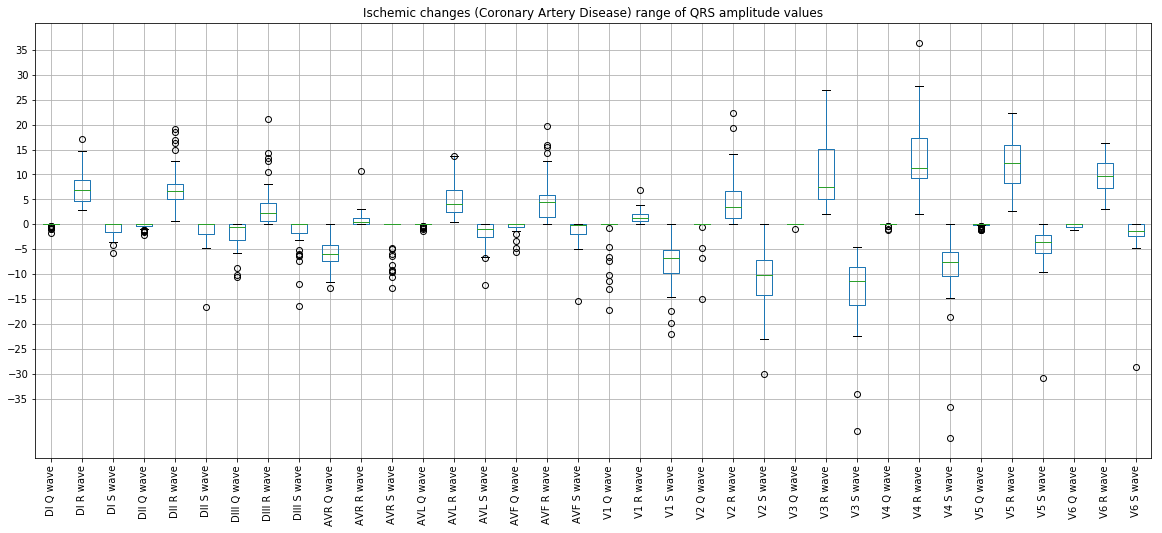

In [27]:
df_edges_amplitude_QRS_Coronary_artery_Disease = df_net_wave_amplitude_QRS[df_net_wave_amplitude_QRS.Pathology == 'Ischemic changes (Coronary Artery Disease)']
df_edges_amplitude_QRS_Coronary_artery_Disease.columns = ['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave', 'Pathology']
boxplot = df_edges_amplitude_QRS_Coronary_artery_Disease.boxplot(column=['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave'], return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Ischemic changes (Coronary Artery Disease) range of QRS amplitude values')

Text(0.5, 1.0, 'Ischemic changes (Coronary Artery Disease) range of QRST amplitude values')

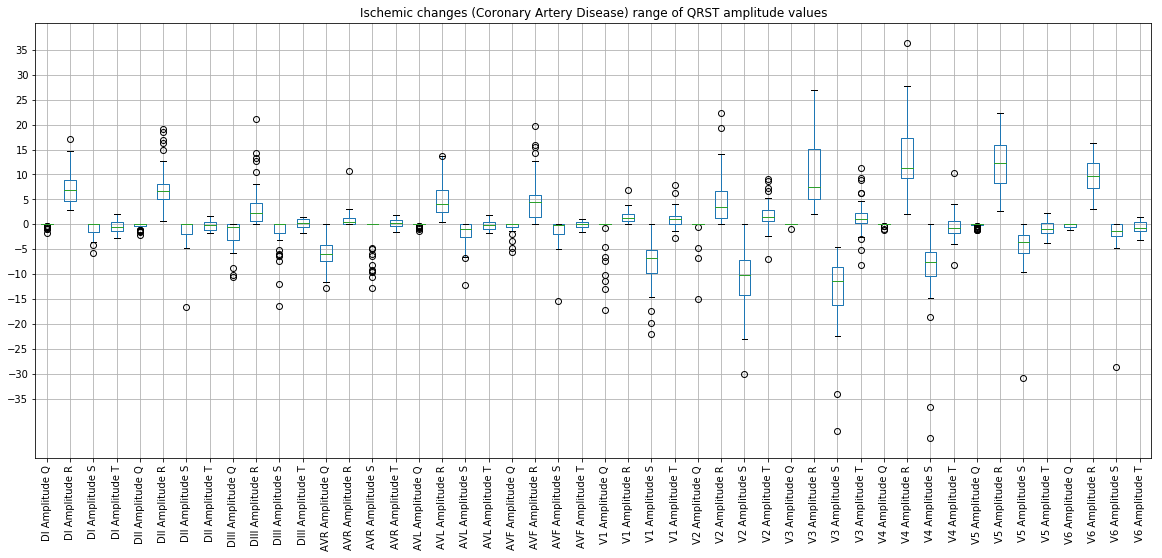

In [144]:
df_edges_amplitude_QRST_Coronary_artery_Disease = df_net_wave_amplitude_QRST[df_net_wave_amplitude_QRST.Pathology == 'Ischemic changes (Coronary Artery Disease)']
df_edges_amplitude_QRST_Coronary_artery_Disease.columns = ['DI Amplitude Q', 'DI Amplitude R', 'DI Amplitude S', 'DI Amplitude T', 'DII Amplitude Q', 'DII Amplitude R', 'DII Amplitude S', 'DII Amplitude T', 'DIII Amplitude Q', 'DIII Amplitude R', 'DIII Amplitude S', 'DIII Amplitude T', 'AVR Amplitude Q', 'AVR Amplitude R', 'AVR Amplitude S', 'AVR Amplitude T', 'AVL Amplitude Q', 'AVL Amplitude R', 'AVL Amplitude S', 'AVL Amplitude T', 'AVF Amplitude Q', 'AVF Amplitude R', 'AVF Amplitude S', 'AVF Amplitude T', 'V1 Amplitude Q', 'V1 Amplitude R', 'V1 Amplitude S', 'V1 Amplitude T', 'V2 Amplitude Q', 'V2 Amplitude R', 'V2 Amplitude S', 'V2 Amplitude T', 'V3 Amplitude Q', 'V3 Amplitude R', 'V3 Amplitude S', 'V3 Amplitude T', 'V4 Amplitude Q', 'V4 Amplitude R', 'V4 Amplitude S', 'V4 Amplitude T', 'V5 Amplitude Q', 'V5 Amplitude R', 'V5 Amplitude S', 'V5 Amplitude T', 'V6 Amplitude Q', 'V6 Amplitude R', 'V6 Amplitude S', 'V6 Amplitude T', 'Pathology']
boxplot = df_edges_amplitude_QRST_Coronary_artery_Disease.boxplot(return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Ischemic changes (Coronary Artery Disease) range of QRST amplitude values')

Text(0.5, 1.0, 'Old Anterior Myocardial Infarction range of QRS amplitude values')

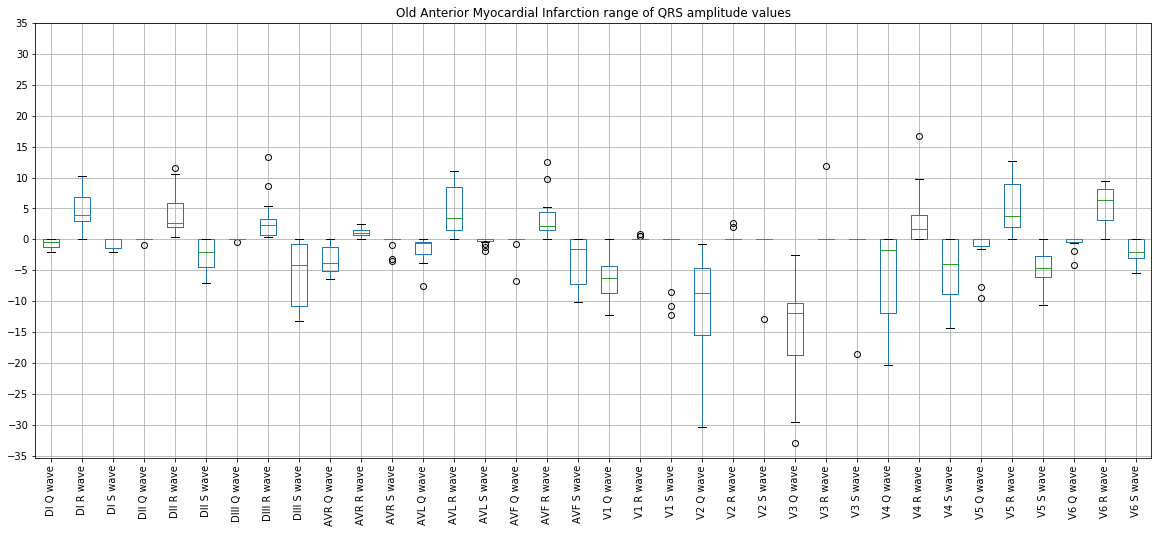

In [28]:
df_edges_amplitude_QRS_Coronary_artery_Disease = df_net_wave_amplitude_QRS[df_net_wave_amplitude_QRS.Pathology == 'Old Anterior Myocardial Infarction']
df_edges_amplitude_QRS_Coronary_artery_Disease.columns = ['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave', 'Pathology']
boxplot = df_edges_amplitude_QRS_Coronary_artery_Disease.boxplot(column=['DI Q wave', 'DI R wave', 'DI S wave', 'DII Q wave', 'DII R wave', 'DII S wave', 'DIII Q wave', 'DIII R wave', 'DIII S wave', 'AVR Q wave', 'AVR R wave', 'AVR S wave', 'AVL Q wave', 'AVL R wave', 'AVL S wave', 'AVF Q wave', 'AVF R wave', 'AVF S wave', 'V1 Q wave', 'V1 R wave', 'V1 S wave', 'V2 Q wave', 'V2 R wave', 'V2 S wave', 'V3 Q wave', 'V3 R wave', 'V3 S wave', 'V4 Q wave', 'V4 R wave', 'V4 S wave', 'V5 Q wave', 'V5 R wave', 'V5 S wave', 'V6 Q wave', 'V6 R wave', 'V6 S wave'], return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Old Anterior Myocardial Infarction range of QRS amplitude values')

Text(0.5, 1.0, 'Old Anterior Myocardial Infarction range of QRST amplitude values')

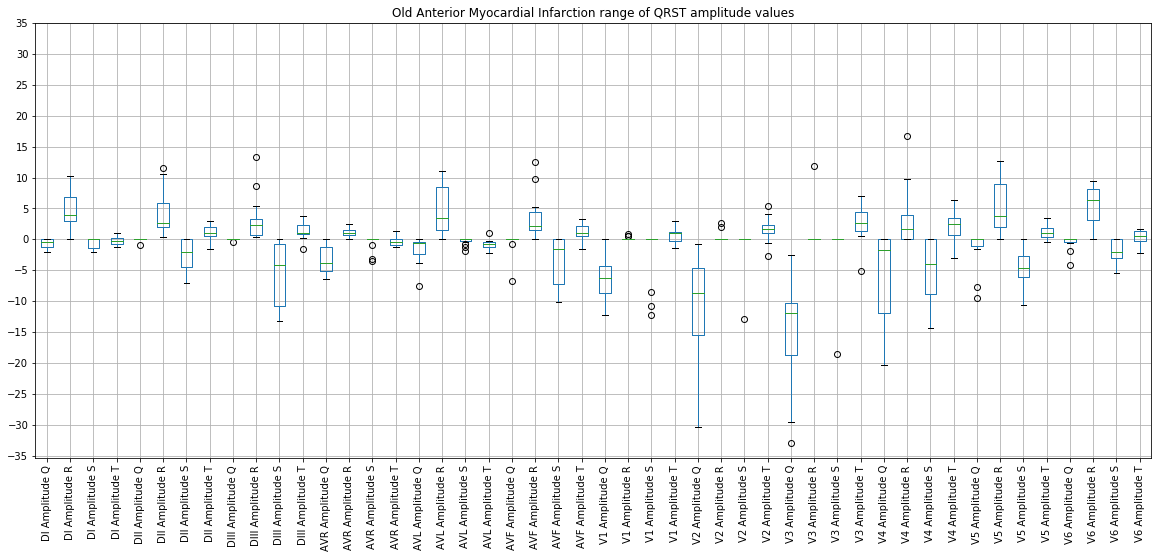

In [145]:
df_edges_amplitude_QRST_Coronary_artery_Disease = df_net_wave_amplitude_QRST[df_net_wave_amplitude_QRST.Pathology == 'Old Anterior Myocardial Infarction']
df_edges_amplitude_QRST_Coronary_artery_Disease.columns = ['DI Amplitude Q', 'DI Amplitude R', 'DI Amplitude S', 'DI Amplitude T', 'DII Amplitude Q', 'DII Amplitude R', 'DII Amplitude S', 'DII Amplitude T', 'DIII Amplitude Q', 'DIII Amplitude R', 'DIII Amplitude S', 'DIII Amplitude T', 'AVR Amplitude Q', 'AVR Amplitude R', 'AVR Amplitude S', 'AVR Amplitude T', 'AVL Amplitude Q', 'AVL Amplitude R', 'AVL Amplitude S', 'AVL Amplitude T', 'AVF Amplitude Q', 'AVF Amplitude R', 'AVF Amplitude S', 'AVF Amplitude T', 'V1 Amplitude Q', 'V1 Amplitude R', 'V1 Amplitude S', 'V1 Amplitude T', 'V2 Amplitude Q', 'V2 Amplitude R', 'V2 Amplitude S', 'V2 Amplitude T', 'V3 Amplitude Q', 'V3 Amplitude R', 'V3 Amplitude S', 'V3 Amplitude T', 'V4 Amplitude Q', 'V4 Amplitude R', 'V4 Amplitude S', 'V4 Amplitude T', 'V5 Amplitude Q', 'V5 Amplitude R', 'V5 Amplitude S', 'V5 Amplitude T', 'V6 Amplitude Q', 'V6 Amplitude R', 'V6 Amplitude S', 'V6 Amplitude T', 'Pathology']
boxplot = df_edges_amplitude_QRST_Coronary_artery_Disease.boxplot(return_type='axes', figsize = (20,8))
plt.xticks(rotation=90)
plt.yticks(np.arange(-35, 36, 5))
boxplot.set_title('Old Anterior Myocardial Infarction range of QRST amplitude values')

Data exploaration

Text(0.5, 0, 'No. of patients')

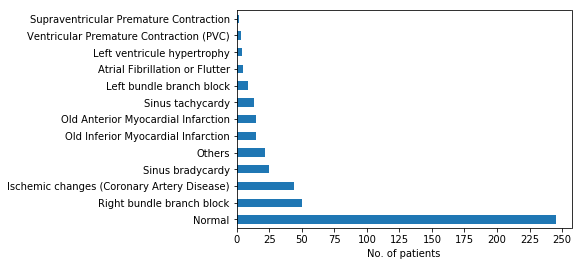

In [23]:
ax = df_nodes['Label'].value_counts().plot(kind='barh')
ax.set_xticks(range(0,251,25))
ax.set_xlabel('No. of patients')

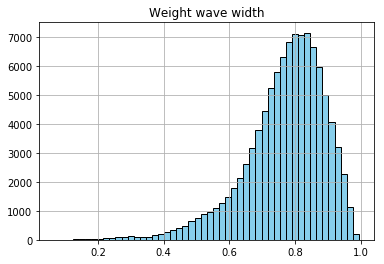

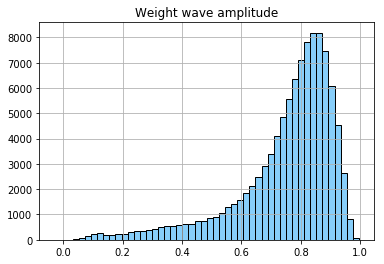

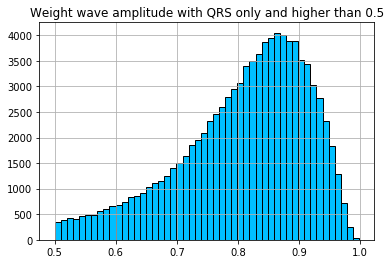

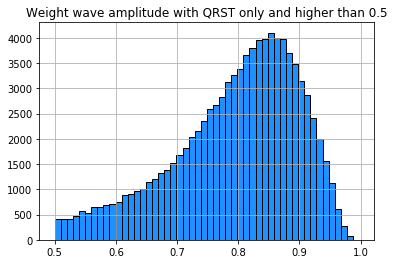

In [152]:
fig, ax = plt.subplots()
plt.hist(df_edges_width['Weight'],bins = 50, edgecolor='black', linewidth=1, color = 'skyblue')
ax.set_title('Weight wave width')
plt.grid(True)

fig, ax = plt.subplots()
plt.hist(df_edges_amplitude['Weight'],bins = 50, edgecolor='black', linewidth=1, color = 'lightskyblue')
ax.set_title('Weight wave amplitude')
plt.grid(True)

fig, ax = plt.subplots()
plt.hist(df_edges_amplitude_QRS['Weight'],bins = 50, edgecolor='black', linewidth=1, color = 'deepskyblue')
ax.set_title('Weight wave amplitude with QRS only and higher than 0.5')
plt.grid(True)

fig, ax = plt.subplots()
plt.hist(df_edges_amplitude_QRST['Weight'],bins = 50, edgecolor='black', linewidth=1, color = 'dodgerblue')
ax.set_title('Weight wave amplitude with QRST only and higher than 0.5')
plt.grid(True)

Print some attributes of the network

In [159]:
#QRS Net
G = nx.from_pandas_edgelist(df_edges_amplitude_QRS,'Source','Target', create_using=nx.DiGraph())
G = G.to_undirected()
print (nx.info(G))
if nx.is_connected(G):
    print('Diameter: %s' % nx.diameter(G)) # print diameter of the network
else:
    print ('Graph not connected: infinite path length')
    print ('Size of largest component: %s' % len(max(nx.connected_components(G), key=len)))
    print ('Degree Assortativity Coefficient (r): %s' % nx.degree_assortativity_coefficient(G))

Name: 
Type: Graph
Number of nodes: 452
Number of edges: 93332
Average degree: 412.9735
Diameter: 3


In [23]:
#QRST Net
G = nx.from_pandas_edgelist(df_edges_amplitude_QRST,'Source','Target',edge_attr = 'Weight')
print (nx.info(G))
if nx.is_connected(G):
    print ('Diameter: %s' % nx.diameter(G)) # print diameter of the network
else:
    print ('Graph not connected: infinite path length')
    print ('Size of largest component: %s' % len(max(nx.connected_components(G), key=len)))
print ('Degree Assortativity Coefficient (r): %s' % nx.degree_assortativity_coefficient(G))

Name: 
Type: Graph
Number of nodes: 452
Number of edges: 93191
Average degree: 412.3496
Diameter: 3
Degree Assortativity Coefficient (r): 0.15109597070706954


### Plot degree distribution

In [61]:
def plot_degree_dist(G):
    degree_hist = nx.degree_histogram(G) 
    degree_hist = np.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    
    # plotting
    fig = plt.figure(figsize=(5,5))
    axes = fig.add_axes([1,1,1,1])
    
    axes.loglog(np.arange(degree_prob.shape[0]), degree_prob, 'b.', markersize=15, alpha=0.5)
    
    axes.set_xlabel('k')
    axes.set_ylabel('p(k)')
    axes.set_title('Degree Distribution')
    
    plt.show()

### Plot weight distribution

In [48]:
#Weight distribution, p(w) as function of w:
def plot_weight_dist(G):
    weight_hist = list(nx.get_edge_attributes(G, 'Weight'))
    weight_hist = np.array(weight_hist, dtype=float)
    degree_prob = weight_hist / G.number_of_nodes()
    # plotting
    fig = plt.figure(figsize=(5, 5))
    axes = fig.add_axes([1, 1, 1, 1])

    axes.loglog(np.arange(degree_prob.shape[0]), degree_prob, 'b.', markersize=15, alpha=0.5)

    axes.set_xlabel('w [log scale]')
    axes.set_ylabel('p(w) [log scale]')
    axes.set_title('Weight Distribution')

    plt.show()

### Plot knn as function of k

Fit function of the form:  $a\cdot X^{\mu}$

In [28]:
def fit_func(x,a,mu):
    return (a*x)**mu

In [49]:
def plot_knn(G, fit=True): 
    knn_dict = nx.k_nearest_neighbors(G) # k_nearest_neighbors return dict with knn for each k
    k_lst = sorted(knn_dict.keys())
    knn_lst = []
    for k in k_lst:
        knn_lst.append(knn_dict[k])
    
    # plotting
    fig = plt.figure(figsize=(5,5))
    axes = fig.add_axes([1,1,1,1])
    
    axes.loglog(k_lst,knn_lst,'b.', markersize=15, alpha=0.5)
    
    axes.set_xlabel('k')
    axes.set_ylabel('knn(k)')
    axes.set_title('Average next neighbor degree')
    
    if fit:
        # fit a*x^mu
        popt, pcov = curve_fit(fit_func, np.array(k_lst), np.array(knn_lst))
        axes.loglog(np.array(k_lst), fit_func(np.array(k_lst), *popt), '--', c='gray')
    
    plt.show()

### Plot snn as function of k

In [50]:
def plot_snn(G, fit=True): 
    snn_dict = nx.k_nearest_neighbors(G, weight='weight') 
    k_lst = sorted(snn_dict.keys())
    snn_lst = []
    for k in k_lst:
        snn_lst.append(snn_dict[k])
    
    # plotting
    fig = plt.figure(figsize=(5,5))
    axes = fig.add_axes([1,1,1,1])
    
    axes.loglog(k_lst,snn_lst,'b.', markersize=15, alpha=0.5)
    
    axes.set_xlabel('k')
    axes.set_ylabel('snn(k)')
    axes.set_title('Average next neighbor strength')
    
    if fit:
        # fit a*x^mu
        popt, pcov = curve_fit(fit_func, np.array(k_lst), np.array(snn_lst))
        axes.loglog(np.array(k_lst), fit_func(np.array(k_lst), *popt), '--', c='gray')
    
    plt.show()

### Clustering coefficient for k
calculate C(k) the average clustering coefficient for nodes with degree k.

In [57]:
def plot_clustering_coefficient(G):
    clustering_dict = {}
    for node in G.nodes():
        k = G.degree(node)
        if not k in clustering_dict:
            clustering_dict[k] = [nx.clustering(G,node)]
        else:
            clustering_dict[k].append(nx.clustering(G,node))
    k_lst = sorted(clustering_dict.keys())
    clustering_lst = []
    for k in k_lst:
        clustering_lst.append(np.array(clustering_dict[k]).mean())
    
    # plotting
    fig = plt.figure(figsize=(5,5))
    axes = fig.add_axes([1,1,1,1])
    
    axes.loglog(k_lst,clustering_lst,'b.', markersize=15, alpha=0.5)
    
    axes.set_xlabel('k')
    axes.set_ylabel('C(k)')
    axes.set_title('Average clustering coefficient')
    
    plt.show()

# Random network analysis

In [33]:
#Creating a random network from our network's information in order to find C_rand
N=G.number_of_nodes()
L=G.number_of_edges()
P=(L/(L+(((N*(N-1))/2))))
G_rand = nx.fast_gnp_random_graph(N,P)
if nx.is_connected(G_rand):
            cc_rand=nx.average_clustering(G_rand)  #get average clustering coefficient of random graph
            cc_real=nx.average_clustering(G)  #get average clustering coefficient of random graph
            print ('Average Clustering Coefficient of Random Graph: %s'%  cc_rand) 
            print('Average Clustering Coefficient of Real Graph: %s' %  cc_real)
            if (cc_rand*2)<cc_real:
                print("We can see that the random graph's clustering coefficient is significantly smaller than the real graph, and therefore the random graph does not provide a good representation for the real graph" )

Average Clustering Coefficient of Random Graph: 0.4762431328838733
Average Clustering Coefficient of Real Graph: 0.9704219475779142
We can see that the random graph's clustering coefficient is significantly smaller than the real graph, and therefore the random graph does not provide a good representation for the real graph


We will wrap the attributes from above and the plots in a function for our convenience

In [76]:
def print_attributes_and_plots(G):
    print (nx.info(G))
    print ('Size of largest component: %s' % len(max(nx.connected_component_subgraphs(G), key=len)))
    if not nx.is_directed(G):
        if nx.is_connected(G):
            print ('Diameter: %s' % nx.diameter(G)) # print diameter of the network
            print('Average Shortest Path Length: %s' % nx.average_shortest_path_length(G)) #print average shortest path length
        else:
            print ('Graph not connected: infinite path length')
            print ('Size of largest component: %s' % len(max(nx.connected_components(G), key=len)))
    print ('Degree Assortativity Coefficient (r): %s' % nx.degree_assortativity_coefficient(G))
    plot_degree_dist(G)
    plot_weight_dist(G)
    plot_knn(G, fit=False)
    plot_snn(G, fit=False)
    if not nx.is_directed(G):
        plot_clustering_coefficient(G)

Name: 
Type: Graph
Number of nodes: 452
Number of edges: 93191
Average degree: 412.3496
Size of largest component: 452
Diameter: 3
Average Shortest Path Length: 1.0870631634715382
Degree Assortativity Coefficient (r): 0.15109597070706954


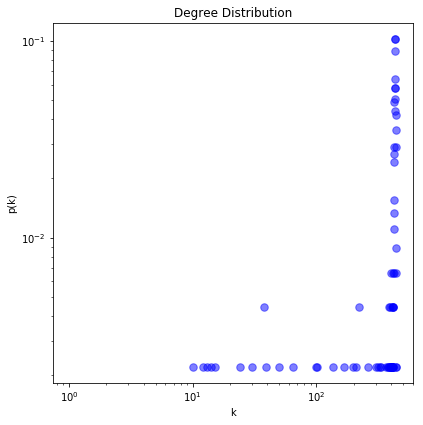

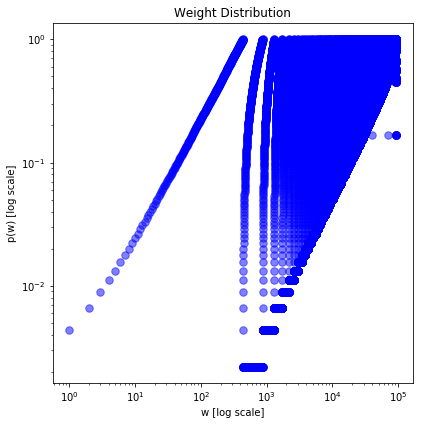

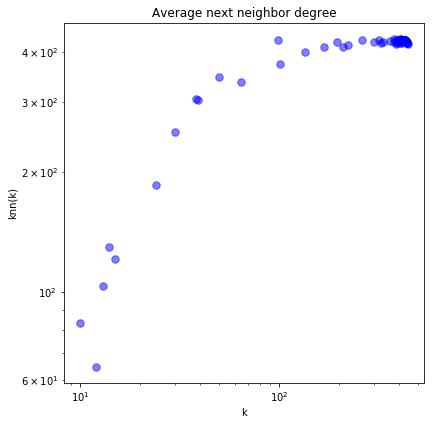

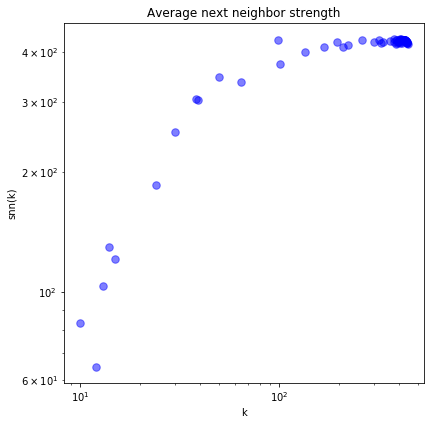

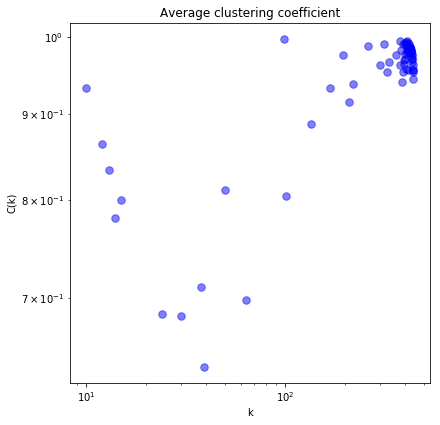

In [77]:
print_attributes_and_plots(G)

In [178]:
print("Average Clustering Coefficient is: " + str(nx.average_clustering(G_QRST)))

Average Clustering Coefficient is: 0.9715484908002288


# Centrality measures

In [63]:
# find degree centrality of the undirected graph
sorted(ce.degree_centrality(G).items(), key=lambda x: x[1])

[(76, 0.022172949002217293),
 (218, 0.026607538802660754),
 (257, 0.028824833702882482),
 (306, 0.031042128603104215),
 (204, 0.03325942350332594),
 (361, 0.05321507760532151),
 (252, 0.06651884700665188),
 (217, 0.08425720620842572),
 (433, 0.08425720620842572),
 (303, 0.08647450110864745),
 (190, 0.11086474501108648),
 (381, 0.1419068736141907),
 (297, 0.21951219512195122),
 (253, 0.22394678492239467),
 (356, 0.29933481152993346),
 (395, 0.37250554323725055),
 (85, 0.43458980044345896),
 (398, 0.4656319290465632),
 (88, 0.49002217294900224),
 (106, 0.49002217294900224),
 (354, 0.5809312638580931),
 (39, 0.6674057649667405),
 (403, 0.7006651884700665),
 (248, 0.7228381374722838),
 (184, 0.738359201773836),
 (449, 0.802660753880266),
 (370, 0.8403547671840355),
 (327, 0.8425720620842572),
 (207, 0.8536585365853658),
 (424, 0.8536585365853658),
 (351, 0.8603104212860311),
 (185, 0.8647450110864745),
 (189, 0.8691796008869179),
 (225, 0.8691796008869179),
 (376, 0.8780487804878049),
 (68

# Undirected grpah diameter and Path length

In [92]:
# retreive the diameter of the undirected graph's largest component
Gc = max(nx.connected_component_subgraphs(G), key=len)
nx.diameter(Gc)

3

In [75]:
print(nx.shortest_path_length(G,3,6)) # get the length of shortest path between 2 nodes (d)
print(nx.average_shortest_path_length(G)) # get the average d: <d>

1
1.0870631634715382


# Community Detection

In [64]:
#Communities with modularity
greedy_mod=greedy_modularity_communities(G)

In [78]:
#Giravn_newman communities:
GN_communities_generator = c.girvan_newman(G)
for i in range(10):
    communities= next(GN_communities_generator)

In [82]:
#Giravn_newman communities:
communities_generator = c.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
comm_sets = sorted(map(sorted, next_level_communities))

In [66]:
#Louvain communities:
partition = community.best_partition(G)

In [65]:
#Communities with modularity
greedy_mod

[frozenset({1,
            2,
            5,
            6,
            9,
            10,
            11,
            13,
            14,
            15,
            16,
            19,
            20,
            22,
            23,
            24,
            26,
            27,
            29,
            32,
            33,
            34,
            35,
            37,
            38,
            41,
            42,
            43,
            45,
            46,
            47,
            48,
            49,
            50,
            51,
            52,
            53,
            54,
            55,
            56,
            57,
            59,
            61,
            62,
            63,
            64,
            65,
            67,
            69,
            70,
            71,
            72,
            74,
            75,
            77,
            78,
            80,
            81,
            82,
            83,
            86,
            87,
            9

In [80]:
#Giravn_Newman communities:
communities

({0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  1

In [67]:
#Louvain communities:
partition

{0: 0,
 1: 1,
 2: 1,
 3: 2,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 2,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 0,
 19: 1,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 1,
 25: 0,
 26: 1,
 27: 1,
 28: 2,
 29: 0,
 30: 0,
 31: 2,
 32: 0,
 33: 2,
 34: 0,
 35: 1,
 36: 0,
 37: 1,
 38: 1,
 39: 2,
 40: 2,
 41: 0,
 42: 1,
 43: 1,
 44: 2,
 45: 0,
 46: 0,
 47: 1,
 48: 1,
 49: 0,
 50: 1,
 51: 0,
 52: 1,
 53: 1,
 54: 0,
 55: 1,
 56: 1,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 0,
 67: 1,
 68: 1,
 69: 0,
 70: 1,
 71: 1,
 72: 1,
 73: 2,
 74: 1,
 75: 1,
 77: 1,
 78: 0,
 79: 0,
 80: 0,
 81: 1,
 82: 0,
 83: 1,
 84: 1,
 85: 0,
 86: 1,
 87: 0,
 88: 0,
 89: 2,
 90: 2,
 91: 0,
 92: 0,
 93: 1,
 94: 0,
 95: 1,
 96: 1,
 97: 1,
 98: 0,
 99: 1,
 100: 1,
 101: 1,
 102: 0,
 103: 1,
 104: 1,
 105: 0,
 106: 1,
 107: 1,
 108: 0,
 109: 1,
 110: 2,
 111: 1,
 112: 0,
 113: 0,
 114: 0,
 115: 1,
 116: 0,
 117: 2,
 118: 0,
 119: 1,
 120: 2,
 121: 0,
 122: 0,
 123: 2,
 1

In [119]:
comm_sets

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  1

In [121]:
#The following code places the community detection results into csv files for gephi:

#turning nested list of communities to dictionary:
def list_to_com_dict(lst):
    dic={}
    com=0
    for i in lst:
        for j in i:
            dic[j]=com
        com+=1
    return dic

# #turn communities to csv:
# def dict_to_csv(dic, file_name):
#     file=pd.DataFrame.from_dict(dic,orient='index')
#     file.reset_index(level=0, inplace=True)
#     file.columns = ["Patient","community"]
#     file.to_csv(file_name, header=True,index=False)
    
# #creating csv for louvain communities   
# dict_to_csv(partition, 'louvain_communities.csv')

# #creating csv for modularity communities
# greedy_mod_dic=list_to_com_dict(greedy_mod)
# dict_to_csv(greedy_mod_dic, 'modularity_communities.csv')

# creating csv for Girvan_Newman communities
GN_comm_sets = sorted(map(sorted, communities))
GN_comm_sets_dic = list_to_com_dict(GN_comm_sets)
dict_to_csv(GN_comm_sets_dic, 'Girvan_Newman_communities.csv')